In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
cd/content/drive/My Drive/Python Collabs/Machine Learning Algorithms

/content/drive/My Drive/Python Collabs/Machine Learning Algorithms


**Importing Libraries**

In [218]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

**Features Abreviations**

* bp: blood_pressure, 
* sg: 'specific gravity',
* al:'albumin',
* su:'sugar',
* rbc:'red blood cells',
* pc:'pus cell',
* pcc:'pus cell clumps',
* ba:'bacteria',
* 'bgr':'blood glucose random',
* 'bu':'blood urea',
* 'sc':'serum creatinine',
* 'sod':'sodium',
* 'pot':'potassium',
* 'hemo':'hemoglobin',
* 'pcv':'packed cell volume',
* 'wc':'white blood cell count',
* 'rc':'red blood cell count',
* 'htn':'hypertension',
* 'dm':'diabetes mellitus',
* 'cad':'coronary artery disease',
* 'appet':'appetite',
* 'pe':'pedal edema',
* 'ane':'anemia',
* 'classification':'class'

In [219]:
data=pd.read_csv("kidney_disease.csv",sep=',')

In [220]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific_gravity','al':'albumin','su':'sugar','rbc':'red_blood_cells','pc':'pus_cell','pcc':'pus_cell_clumps','ba':'bacteria','bgr':'blood_glucose_random','bu':'blood_urea','sc':'serum_creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed_cell_volume','wc':'white_blood_cell_count','rc':'red_blood_cell_count','htn':'hypertension','dm':'diabetes_mellitus','cad':'coronary_artery_disease','appet':'appetite','pe':'pedal_edema','ane':'anemia','classification':'class'},inplace=True)

In [221]:
data.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [223]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [224]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

#**Data Preprocessing**

There is 4 types of missing/error values into the data

* Features (1-2-3-4-5-10-11-12-13-14-15) are numeric / nan for messing values
* Features (6-7-8-9-19-22-23-24) are categoric  / nan for messing values
* Features 16-17-18 numeric but converted categoric through '' and values with typing errors
* Features 20-21-25 are categoric but error typing with /!?

In [225]:
for i in data.columns:
  print(data[i].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

* features 16-17-18 numeric but converted categoric through '' and values with typing errors
* Features 20-21-25 are categoric but error typing with /!?

**Treating Features 16-17-18**

We start by preprocessing the 3rd type of features in the data :
* Features n° 16-17-18 numeric but converted categoric through '' and values with typing errors

In [226]:
data.columns[16]

'packed_cell_volume'

In [227]:
data['packed_cell_volume'].unique() 

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [228]:
data['packed_cell_volume'] = data['packed_cell_volume'].replace({'\t?': np.nan,'\t43':43,'nan':np.nan})

In [229]:
for i in range(0,len(data['packed_cell_volume'])):
   if type(data['packed_cell_volume'][i])==str:
     data['packed_cell_volume'][i]=float(data['packed_cell_volume'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [230]:
data.columns[17]

'white_blood_cell_count'

In [231]:
data['white_blood_cell_count'] = data['white_blood_cell_count'].replace({'\t6200': 6200, '\t8400':8400,'\t?':np.nan,'nan':np.nan})

In [232]:
for i in range(0,len(data['white_blood_cell_count'])):
   if type(data['white_blood_cell_count'][i])==str:
     data['white_blood_cell_count'][i]=float(data['white_blood_cell_count'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [233]:
data.columns[18]

'red_blood_cell_count'

In [234]:
data['red_blood_cell_count'].unique() 

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [235]:
data['red_blood_cell_count'] = data['red_blood_cell_count'].replace({'\t?':np.nan,'nan':np.nan})

In [236]:
for i in range(0,len(data['red_blood_cell_count'])):
   if type(data['red_blood_cell_count'][i])==str:
     data['red_blood_cell_count'][i]=float(data['red_blood_cell_count'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

**Treating Features 20-21-25**
* Features 20-21-25 are categoric but error typing with /!?

In [238]:
data.columns[20]

'diabetes_mellitus'

In [239]:
data['diabetes_mellitus'].unique() 

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [240]:
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace({' yes':np.nan,'nan':np.nan,'\tno':'no','\tyes':'yes'})

In [241]:
data.columns[21]

'coronary_artery_disease'

In [242]:
data['coronary_artery_disease'].unique() 

array(['no', 'yes', '\tno', nan], dtype=object)

In [243]:
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace({'nan':np.nan,'\tno':'no'})

In [244]:
data.columns[25]

'class'

In [245]:
data['class'].unique() 

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [246]:
data['class'] = data['class'].replace({'ckd\t':'ckd'})

**Replacing Missing Numerical Values**


In [247]:
numerical_values = data[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]

In [248]:
numerical_values

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


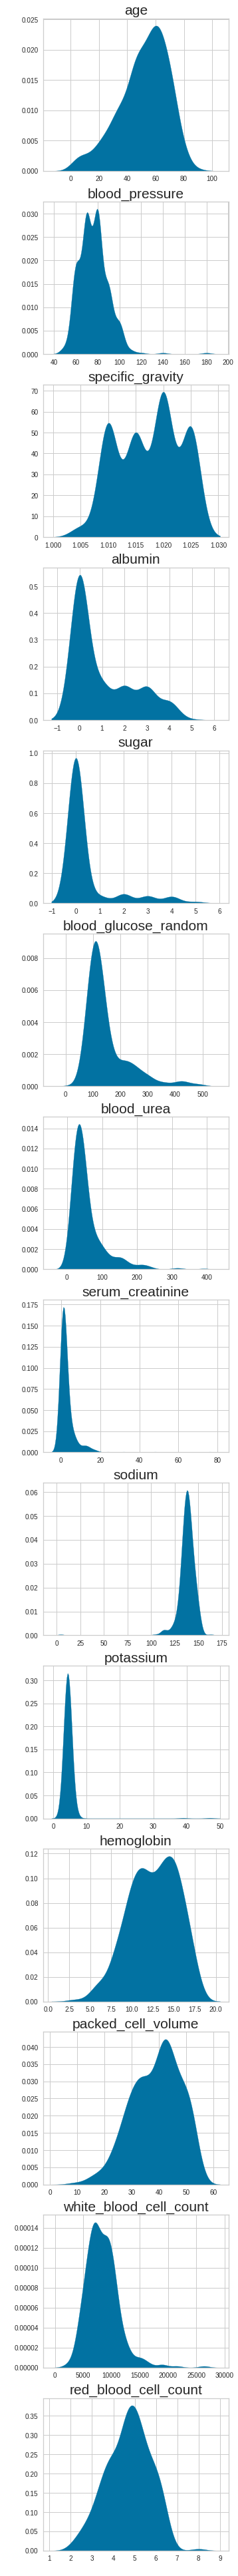

In [249]:
fig,ax=plt.subplots(figsize=(5,70),ncols=1,nrows=14)

i=0
for col in numerical_values :
    sns.kdeplot(x=numerical_values[col],fill=True,alpha=1,ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].set_title(col,fontsize=21)
    i=i+1
plt.show()

Features with skewness between -0.05 and 0.005 are considered a Gaussian Normal Distribution.

In [250]:
# check skewness of the distribution 
skew=[]
for col in numerical_values.columns:
    skew.append(round(data[col].skew(),3))
num_dist=pd.DataFrame({'features': numerical_values.columns,'skewness':skew})
num_dist

,features,skewness
0,age,-0.668
1,blood_pressure,1.605
2,specific_gravity,-0.172
3,albumin,0.998
4,sugar,2.464
5,blood_glucose_random,2.011
6,blood_urea,2.634
7,serum_creatinine,7.510
8,sodium,-6.997
9,potassium,11.583


The values of skew are not in the range so all numeric values must be changed with median

In [251]:
numerical_values[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']]=numerical_values[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']].fillna(numerical_values[['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']].median())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [252]:
numerical_values.isnull().sum()          # Numerical Features without target

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

**Treating Outliers**

Since the dimension of dataset is small, no need to remove outliers

**Replacing Categoric missing Values**

In [253]:
categorical_values = data.drop(['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count'], axis=1)

In [254]:
categorical_values = categorical_values.fillna(categorical_values.mode().iloc[0])

In [255]:
categorical_values.isnull().sum()   # Categorical values with target

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [256]:
categorical_values['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [257]:
categorical_values['red_blood_cells']=categorical_values['red_blood_cells'].map({'normal':0,'abnormal':1})
categorical_values['pus_cell']=categorical_values['pus_cell'].map({'normal':0,'abnormal':1})
categorical_values['pus_cell_clumps']=categorical_values['pus_cell_clumps'].map({'notpresent':0,'present':1})
categorical_values['bacteria']=categorical_values['bacteria'].map({'notpresent':0,'present':1})
categorical_values['hypertension']=categorical_values['hypertension'].map({'no':0,'yes':1})
categorical_values['diabetes_mellitus']=categorical_values['diabetes_mellitus'].map({'no':0,'yes':1})
categorical_values['coronary_artery_disease']=categorical_values['coronary_artery_disease'].map({'no':0,'yes':1})
categorical_values['appetite']=categorical_values['appetite'].map({'poor':1,'good':0})
categorical_values['pedal_edema']=categorical_values['pedal_edema'].map({'no':0,'yes':1})
categorical_values['anemia']=categorical_values['anemia'].map({'no':0,'yes':1})

**Target Feature**

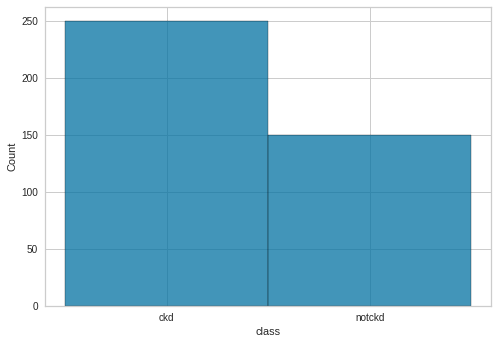

In [258]:
sns.histplot(categorical_values['class'])

In [259]:
categorical_values['class']=categorical_values['class'].map({'notckd':0,'ckd':1})

**Correlation matrix for features selection**

In [260]:
classification=categorical_values['class']

In [261]:
numerical_values1=numerical_values.copy()   # Numerical Features with target

In [262]:
numerical_values1['class']=classification

In [263]:
numerical_values1              # Numerical Features with target

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0


In [264]:
from sklearn.preprocessing import StandardScaler
# extracting out the features
x1 = numerical_values1.values
# Standardizing the features
x1_standardized = StandardScaler().fit_transform(x1)
x1_standardized.shape

(400, 15)

In [265]:
#v dataframe is a Numerical values standardized without Target
v=pd.DataFrame(x1_standardized,columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','class'])

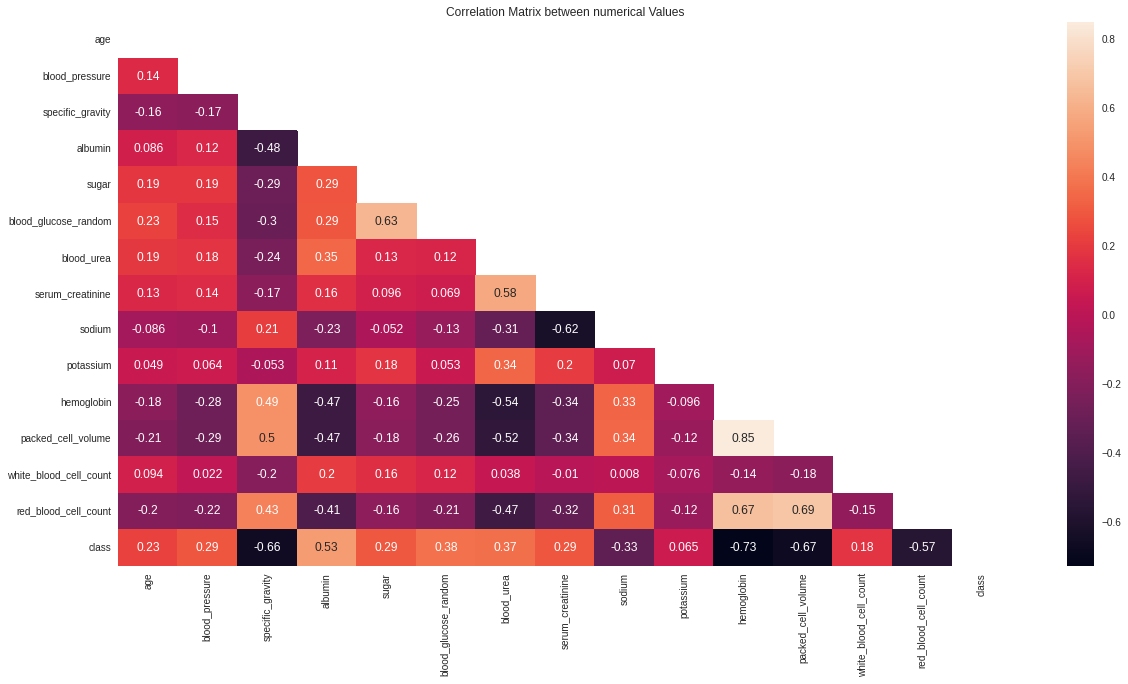

In [266]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix between numerical Values')
mask=np.triu(np.ones_like(v.corr()))
sns.heatmap(v.corr(),annot=True,mask=mask)
plt.show()

The **hemoglobin** is highly correlated with **packed cell volume** (0,85)
so we look for the relation between these two features with the target
hemoglobin is -0.73 and pcv is -0.67 with the target
So we keep the hemoglobin and drop the pcv
-By the same method we drop **red_blood_cell_count** which is correlated with hemoglobin
-we drop **sugar** correlated with blood_glucose_random

In [267]:
data2=data.copy()
numerical_values2=numerical_values.copy()

In [268]:
data2.drop('packed_cell_volume',axis=1,inplace=True)
numerical_values2.drop('packed_cell_volume',axis=1,inplace=True)
data2.drop('red_blood_cell_count',axis=1,inplace=True)
numerical_values2.drop('red_blood_cell_count',axis=1,inplace=True)
data2.drop('sugar',axis=1,inplace=True)
numerical_values2.drop('sugar',axis=1,inplace=True)

In [269]:
numerical_values2

,age,blood_pressure,specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,white_blood_cell_count
0,48.0,80.0,1.020,1.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0
1,7.0,50.0,1.020,4.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0
2,62.0,80.0,1.010,2.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0
3,48.0,70.0,1.005,4.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0
4,51.0,80.0,1.010,2.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,140.0,49.0,0.5,150.0,4.9,15.7,6700.0
396,42.0,70.0,1.025,0.0,75.0,31.0,1.2,141.0,3.5,16.5,7800.0
397,12.0,80.0,1.020,0.0,100.0,26.0,0.6,137.0,4.4,15.8,6600.0
398,17.0,60.0,1.025,0.0,114.0,50.0,1.0,135.0,4.9,14.2,7200.0


**Violon and grouped boxplot graph for features selection**

In [270]:
new_df = pd.concat([numerical_values, categorical_values], axis=1)

In [271]:
new_df  # Numerical + categorical features encoded(0,1) with target

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,0,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,0,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,0,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,0,0,0,0,0,0,0,0,0,0


In [272]:
Y=new_df['class']
X=numerical_values        # Numerical Features only without target

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

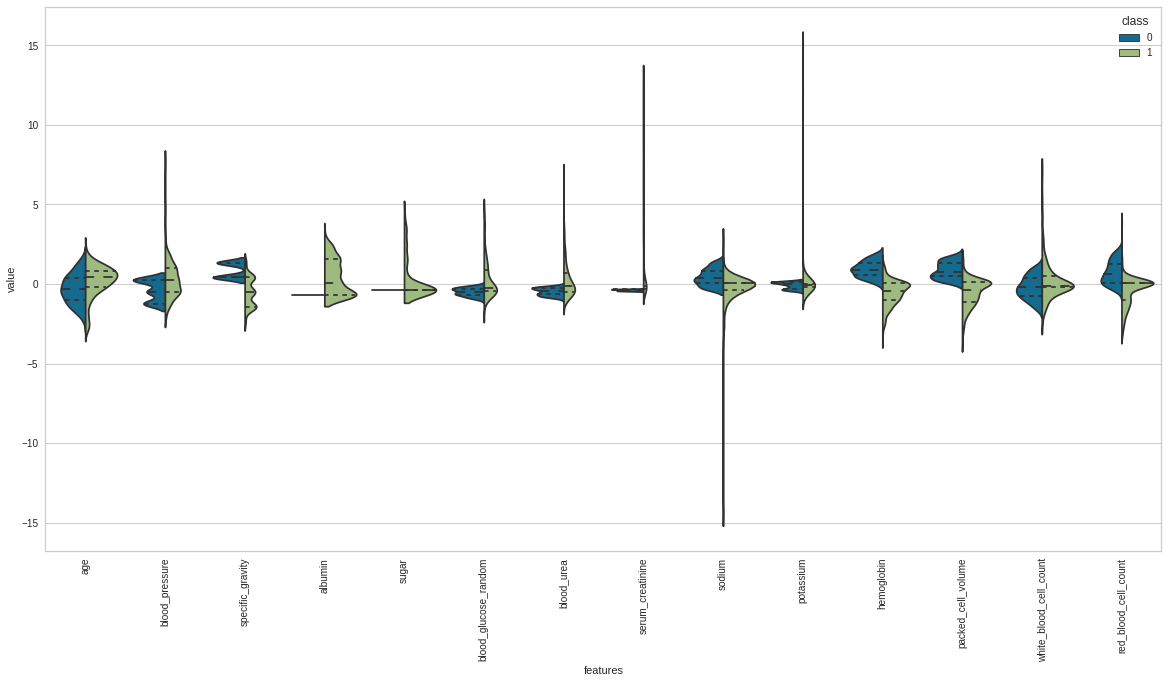

In [273]:
data_dia = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
j=pd.DataFrame(data_n_2,columns=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'])
data = pd.concat([Y,j.iloc[:,0:14]],axis=1)
data = pd.melt(data,id_vars='class',
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="class", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

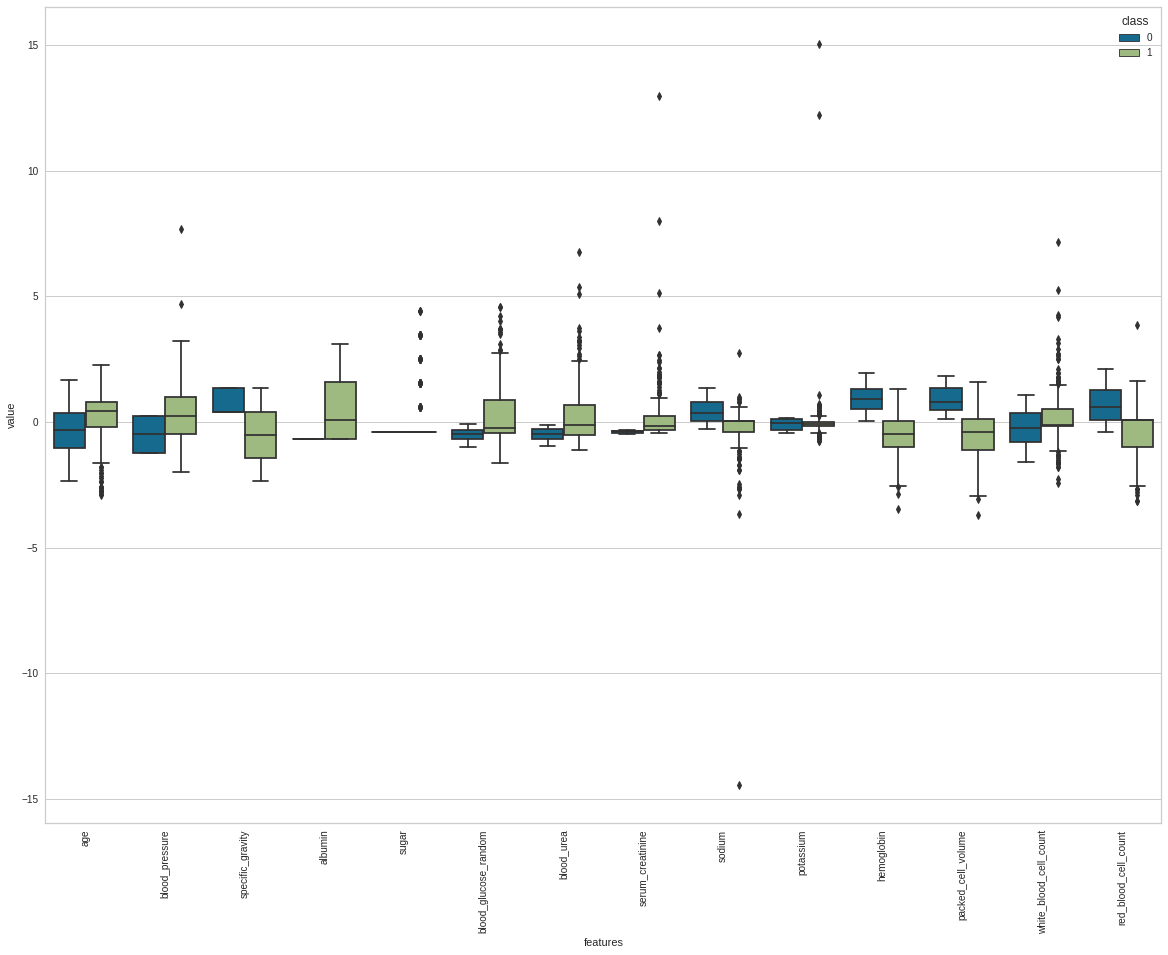

In [274]:
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y="value", hue="class", data=data)
plt.xticks(rotation=90)

the graph above show the separation between features and target
The patterns with close median values with target are better avoided
We can retain the feature wich represents a deperated patterns

**Dropping Features Choice**

For Model work later we keep the below features

['blood_pressure',
 'specific_gravity',
 'blood_glucose_random',
 'hemoglobin',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema','anemia']

In [275]:
list_feat=new_df.columns.values.tolist()
list_feat

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

**Plotting matrix correlation with standardized features**

In [276]:
from sklearn.preprocessing import StandardScaler
# extracting out the features
x = new_df.loc[:, list_feat].values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-0.21003135,  0.25421378,  0.4214856 , ..., -0.4843221 ,
        -0.42008403,  0.77459667],
       [-2.62723421, -1.97247624,  0.4214856 , ..., -0.4843221 ,
        -0.42008403,  0.77459667],
       [ 0.615355  ,  0.25421378, -1.4210744 , ..., -0.4843221 ,
         2.38047614,  0.77459667],
       ...,
       [-2.33245337,  0.25421378,  0.4214856 , ..., -0.4843221 ,
        -0.42008403, -1.29099445],
       [-2.03767254, -1.23024623,  1.3427656 , ..., -0.4843221 ,
        -0.42008403, -1.29099445],
       [ 0.37953033,  0.25421378,  1.3427656 , ..., -0.4843221 ,
        -0.42008403, -1.29099445]])

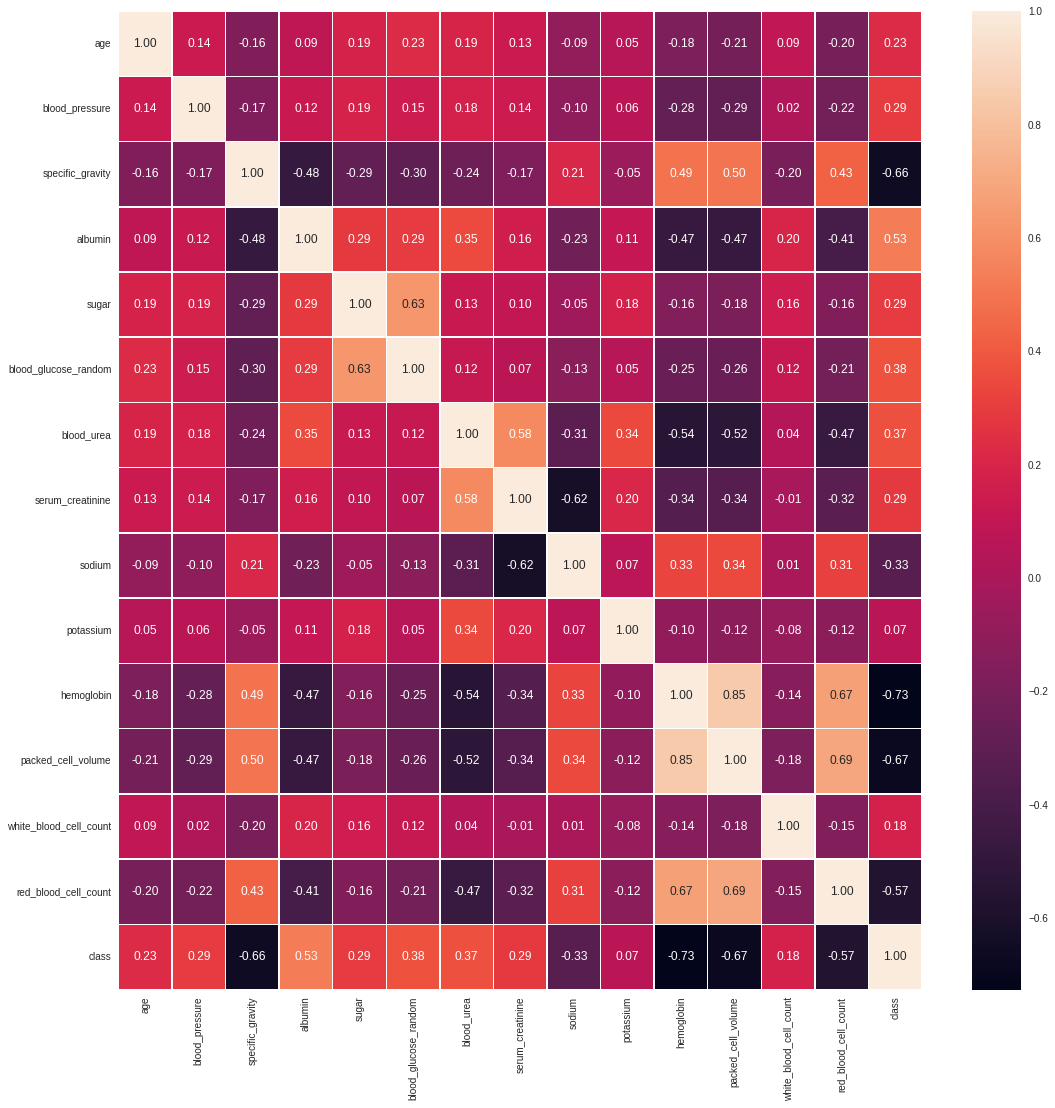

In [277]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(v.corr(), annot=True, linewidths=.5, fmt='.2f',ax=ax)

**Plotting Pearson Visualizer**

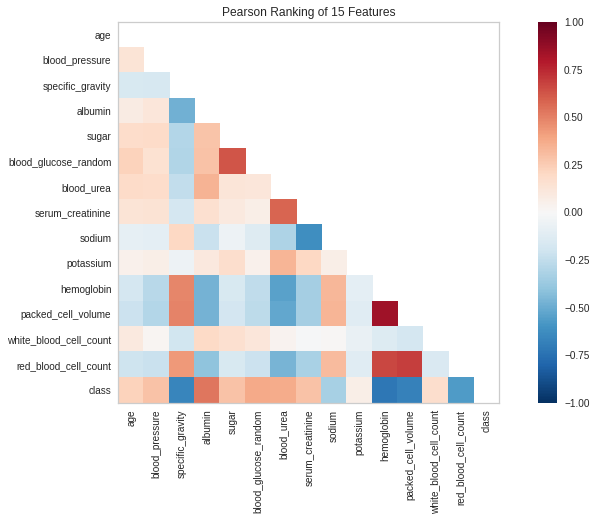

In [278]:
from yellowbrick.features import Rank2D

# Modify the figure size
fig, ax=plt.subplots(figsize=(14,7))

# Instantiate the Rank2D object with default arguments: visualizer
visualizer = Rank2D(algorithm="pearson")

# fit the visualizer
visualizer.fit_transform(v)

# Plot the visualizer with .poof() method
visualizer.poof()

Looking for correlation between features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


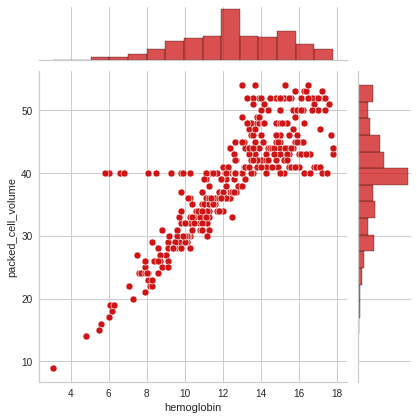

In [279]:
sns.jointplot(X.loc[:,'hemoglobin'], X.loc[:,'packed_cell_volume'], color="#ce1414")

In this correlation visulation the information checked above
are confirmed : Hemoglobin and packed cell volume are highly correlated
We apply it in the model and we keep only the hemoglobin feature

#**Supurvised Learning**

##**Logistic Regression**

In [280]:
df_std=pd.DataFrame(x_standardized,columns=list_feat)

In [281]:
df_std

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,...,-0.484322,-0.342518,-0.241249,1.311903,1.393261,-0.304789,-0.507801,-0.484322,-0.420084,0.774597
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,...,-0.484322,-0.342518,-0.241249,-0.762252,-0.717741,-0.304789,-0.507801,-0.484322,-0.420084,0.774597
2,0.615355,0.254214,-1.421074,0.838742,2.507853,3.697618,-0.074858,-0.212942,0.040104,-0.062903,...,-0.484322,-0.342518,-0.241249,-0.762252,1.393261,-0.304789,1.969276,-0.484322,2.380476,0.774597
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,...,2.064742,2.919556,-0.241249,1.311903,-0.717741,-0.304789,1.969276,2.064742,2.380476,0.774597
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,...,-0.484322,-0.342518,-0.241249,-0.762252,-0.717741,-0.304789,-0.507801,-0.484322,-0.420084,0.774597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202662,0.254214,0.421486,-0.686244,-0.380269,-0.067350,-0.155939,-0.444182,1.345187,0.114539,...,-0.484322,-0.342518,-0.241249,-0.762252,-0.717741,-0.304789,-0.507801,-0.484322,-0.420084,-1.290994
396,-0.563768,-0.488016,1.342766,-0.686244,-0.380269,-0.932096,-0.520803,-0.319668,0.366375,-0.382298,...,-0.484322,-0.342518,-0.241249,-0.762252,-0.717741,-0.304789,-0.507801,-0.484322,-0.420084,-1.290994
397,-2.332453,0.254214,0.421486,-0.686244,-0.380269,-0.599501,-0.622154,-0.426395,-0.068653,-0.062903,...,-0.484322,-0.342518,-0.241249,-0.762252,-0.717741,-0.304789,-0.507801,-0.484322,-0.420084,-1.290994
398,-2.037673,-1.230246,1.342766,-0.686244,-0.380269,-0.413248,-0.135669,-0.355244,-0.286167,0.114539,...,-0.484322,-0.342518,-0.241249,-0.762252,-0.717741,-0.304789,-0.507801,-0.484322,-0.420084,-1.290994


In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = df_std[['blood_pressure',
 'specific_gravity',
 'blood_glucose_random',
 'hemoglobin',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema','anemia']]
y = new_df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=20)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred_log  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.98


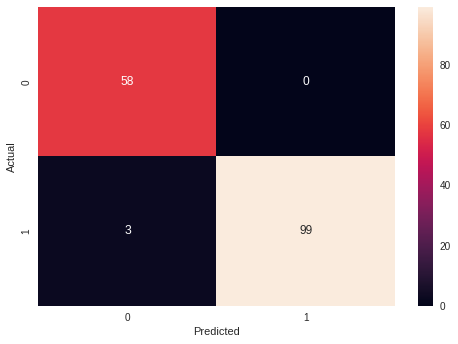

In [283]:
confusion_matrix = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [284]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.97      0.99       102

    accuracy                           0.98       160
   macro avg       0.98      0.99      0.98       160
weighted avg       0.98      0.98      0.98       160



**Conclusion**

The Logistic Regression Model have an excellent accuracy score of 98%



##**KNN**

In [285]:
#import the relevant libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred_knn=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn,y_test))

Acuuracy= 0.88125


In [286]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y1_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y1_pred,y_test),2))
    scores.append(round(accuracy_score(y1_pred,y_test),2))

Accuracy for k= 1 is: 0.84
Accuracy for k= 2 is: 0.83
Accuracy for k= 3 is: 0.84
Accuracy for k= 4 is: 0.84
Accuracy for k= 5 is: 0.86
Accuracy for k= 6 is: 0.86
Accuracy for k= 7 is: 0.86
Accuracy for k= 8 is: 0.86
Accuracy for k= 9 is: 0.88
Accuracy for k= 10 is: 0.88
Accuracy for k= 11 is: 0.89
Accuracy for k= 12 is: 0.88
Accuracy for k= 13 is: 0.91
Accuracy for k= 14 is: 0.91
Accuracy for k= 15 is: 0.92
Accuracy for k= 16 is: 0.91
Accuracy for k= 17 is: 0.92
Accuracy for k= 18 is: 0.92
Accuracy for k= 19 is: 0.92
Accuracy for k= 20 is: 0.92
Accuracy for k= 21 is: 0.94
Accuracy for k= 22 is: 0.93
Accuracy for k= 23 is: 0.95
Accuracy for k= 24 is: 0.95
Accuracy for k= 25 is: 0.96
Accuracy for k= 26 is: 0.94
Accuracy for k= 27 is: 0.96
Accuracy for k= 28 is: 0.96
Accuracy for k= 29 is: 0.96


Text(0, 0.5, 'Testing Accuracy')

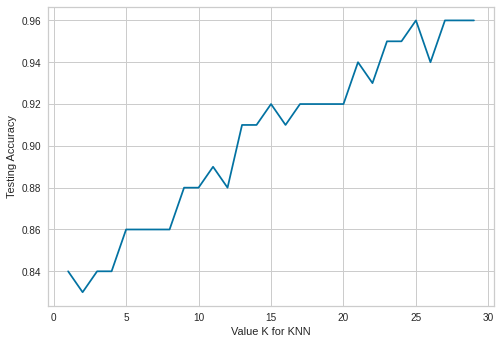

In [287]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [288]:
#import the relevant libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred_knn=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn,y_test))

Acuuracy= 0.95625


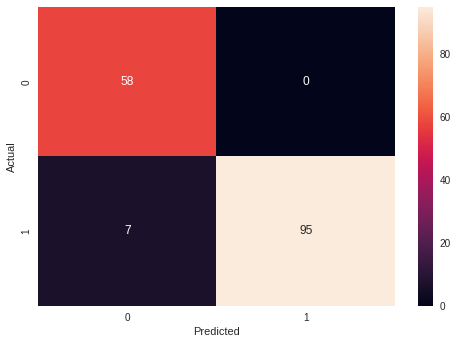

In [289]:
confusion_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.93      0.96       102

    accuracy                           0.96       160
   macro avg       0.95      0.97      0.95       160
weighted avg       0.96      0.96      0.96       160



**Conclusion**

The initial accuracy was 88% after choosing the optimal K value
we obtain an accuracy of 95%

##**Decision tree and random forest**

**decision Tree**

In [291]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x = df_std[['blood_pressure',
 'specific_gravity',
 'blood_glucose_random',
 'hemoglobin',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema','anemia']]
y = new_df['class']
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4,random_state=20)
#applying tree algorithm
model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   #fitting our model
y_pred_DT=model.predict(x_test)   # evaluating our model
print("The score for this model is:{}".format(accuracy_score(y_pred_DT,y_test)))

The score for this model is:0.96875


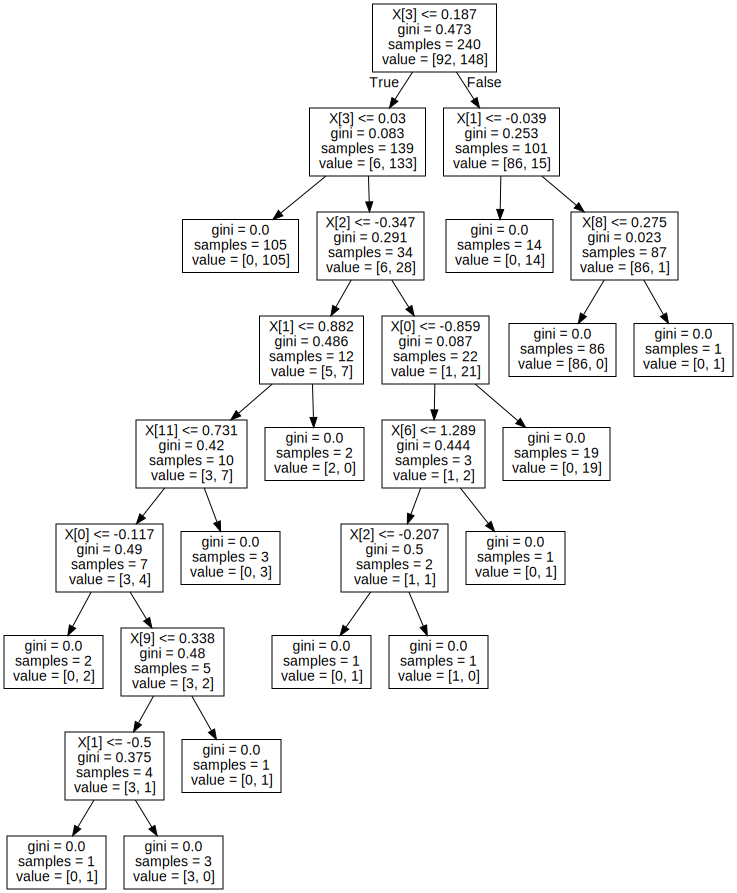

In [292]:
import graphviz
from sklearn.tree import export_graphviz
dot_data=tree.export_graphviz(model, out_file=None)
graph=graphviz.Source(dot_data)
graph.render('df_std')
graph

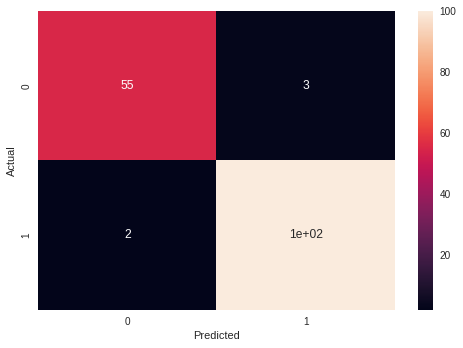

In [293]:
confusion_matrix = pd.crosstab(y_test, y_pred_DT, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [294]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.97      0.98      0.98       102

    accuracy                           0.97       160
   macro avg       0.97      0.96      0.97       160
weighted avg       0.97      0.97      0.97       160



**Conclusion**

The decision tree model have an accuracy of 95%

**Random Forest**

In [295]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [296]:
clf=RandomForestClassifier(n_estimators=10,bootstrap=True)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred_rf=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_pred_rf,y_test))  #Measuring the accuracy of our model

Accuracy: 0.9875


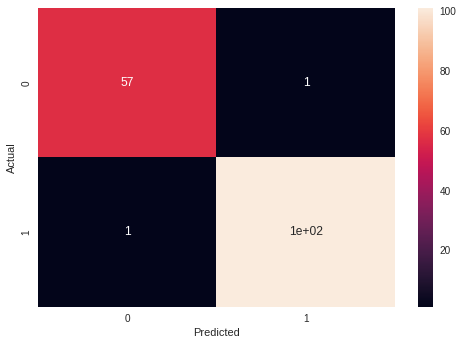

In [297]:
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [298]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.99      0.99      0.99       102

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



**General Conclusion Supervised Learning**

The random forest accuracy is 98.75%

The best accuracy all over the other models is given by the random forest model

Furthermore the model HAVE less FN cases than other models which is important

in the application of detection of a chronic dangerous disease. 

#**Unsupervised Learning**

In [299]:
new_df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,...,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,0,0,0,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,0,0,0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,0,0,0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,1,0,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,0,0,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,0,0,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,0,0,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,0,0,0,0,0,0,0,0,0,0


In [300]:
df_uns=new_df[['blood_pressure',
 'specific_gravity',
 'blood_glucose_random',
 'hemoglobin',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema','anemia']]

In [301]:
df_uns

,blood_pressure,specific_gravity,blood_glucose_random,hemoglobin,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,80.0,1.020,121.0,15.4,0,0,0,0,1,1,0,0,0,0
1,50.0,1.020,121.0,11.3,0,0,0,0,0,0,0,0,0,0
2,80.0,1.010,423.0,9.6,0,0,0,0,0,1,0,1,0,1
3,70.0,1.005,117.0,11.2,0,1,1,0,1,0,0,1,1,1
4,80.0,1.010,106.0,11.6,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,140.0,15.7,0,0,0,0,0,0,0,0,0,0
396,70.0,1.025,75.0,16.5,0,0,0,0,0,0,0,0,0,0
397,80.0,1.020,100.0,15.8,0,0,0,0,0,0,0,0,0,0
398,60.0,1.025,114.0,14.2,0,0,0,0,0,0,0,0,0,0


In [302]:
df_uns.columns

Index(['blood_pressure', 'specific_gravity', 'blood_glucose_random',
       'hemoglobin', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
       'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia'],
      dtype='object')

In [303]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
columns_names=df_uns.columns
d=scaler.fit_transform(df_uns)
scaled_df=pd.DataFrame(d,columns=columns_names)
scaled_df.head()

,blood_pressure,specific_gravity,blood_glucose_random,hemoglobin,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,0.230769,0.75,0.211538,0.836735,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.75,0.211538,0.557823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.230769,0.25,0.856838,0.442177,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.153846,0.00,0.202991,0.551020,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.230769,0.25,0.179487,0.578231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Hiearchical Clustering**

In [304]:
from sklearn.cluster import AgglomerativeClustering
model_AgCl=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
clust_labels=model_AgCl.fit_predict(df_uns)

In [305]:
agglomerative=pd.DataFrame(clust_labels)

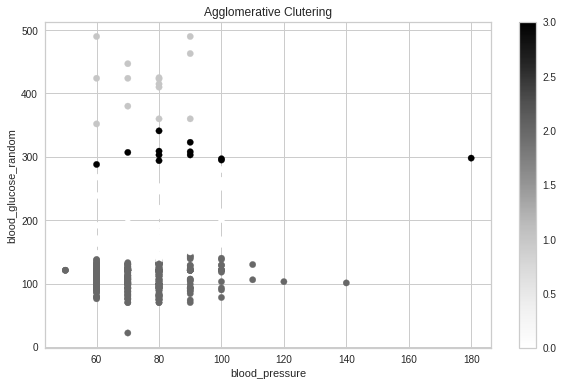

In [306]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
scatter=ax.scatter(df_uns.blood_pressure,df_uns.blood_glucose_random,c=agglomerative[0],s=40)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("blood_pressure")
ax.set_ylabel("blood_glucose_random")
plt.colorbar(scatter)

##**Plotting Dendrogram**

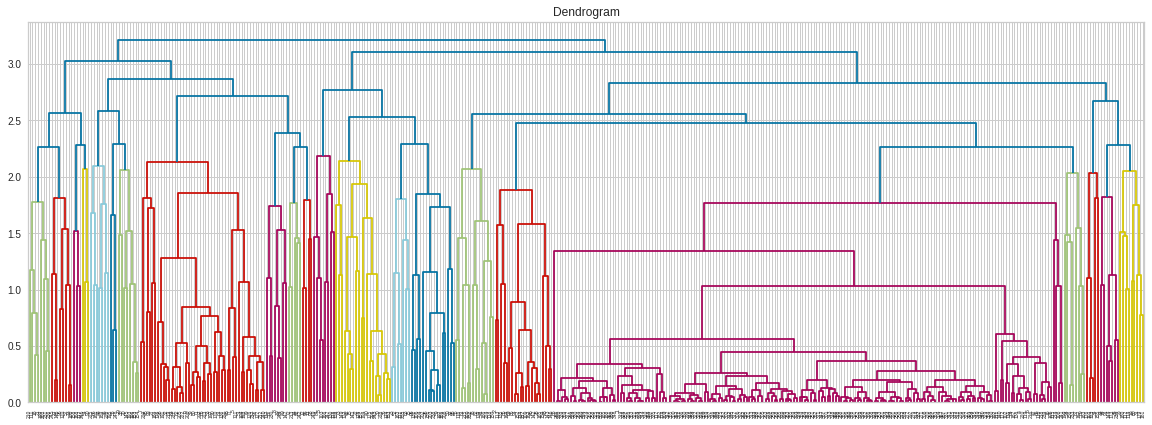

In [307]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(scaled_df,method='complete'))

##**KMEans Clustering**

In [308]:
selected_feat=scaled_df.iloc[:,[0,2]].values

In [309]:
from sklearn.cluster import KMeans
kmeans5=KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(selected_feat)

In [310]:
label=pd.DataFrame(kmeans5.labels_)

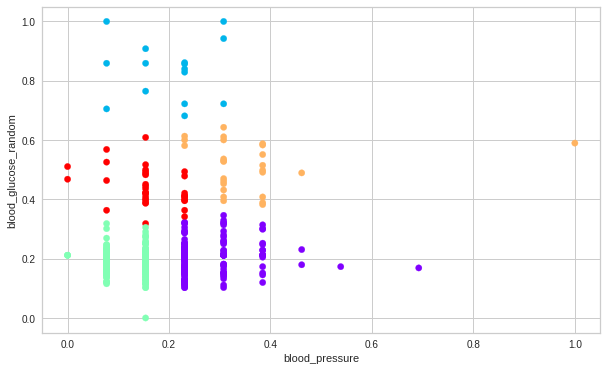

In [311]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel("blood_pressure")
ax.set_ylabel("blood_glucose_random")
plt.scatter(selected_feat[:, 0], selected_feat[:, 1], s = 40, c = y_kmeans5, cmap='rainbow',)

In [312]:
Sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(scaled_df)
  Sum_of_squared_distances.append(km.inertia_)

**K Choosing**

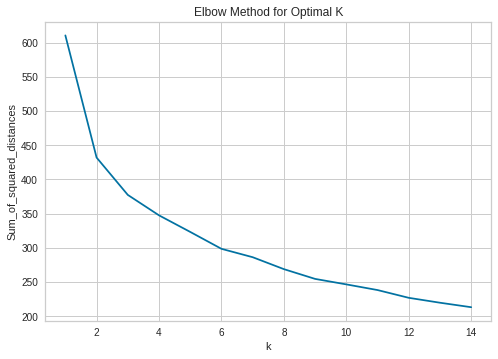

In [313]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal K')
plt.show()

The optimal K value is 2

In [314]:
kmeans2=KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(selected_feat)

In [315]:
label=pd.DataFrame(kmeans2.labels_)

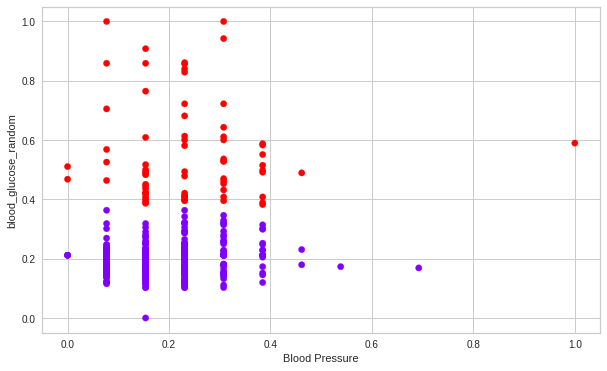

In [316]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel("Blood Pressure")
ax.set_ylabel("blood_glucose_random")
plt.scatter(selected_feat[:, 0], selected_feat[:, 1], s = 40, c = y_kmeans2, cmap='rainbow',)

**Conclusion**

The Kmeans clustering model shows a slight 2 clusters:

**Cluster1**: Low Blood Pressure with low Blood Glucose random

**Cluster2**: Low Blood Pressure with High Blood glucose random

#**GENERAL CONCLUSION**



The study of the dataset and the using of Machine learning Algorithms shows

a difference in the accuracies between the different models of supervised ML .

Logistic regression and Random forest gave a good accuracy scores but we have 

always the possibility to optomize the other models by tuning the parameters (KNN Model).

In the second part and with using of unsupervised ML algorithms the results are 

less satisfying due to the nature of the dataset (labeled).

The choice of the algorithm is always depending of the purpose of the study and 

the final application.